<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula02b_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20, slop=[2, 1], intercept=-0.4):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinário(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.05205712, 0.48773102],
        [0.30910242, 0.28717982],
        [0.77824827, 0.62758816],
        [0.70654944, 0.67296253],
        [0.26307236, 0.79465926],
        [0.61325281, 0.77583121],
        [0.30443008, 0.00449778],
        [0.9091159 , 0.45752419],
        [0.81493254, 0.34928832],
        [0.42859364, 0.16759609],
        [0.34455246, 0.75472747],
        [0.35062828, 0.75771915],
        [0.63671176, 0.37512069],
        [0.43632301, 0.81598001],
        [0.1553133 , 0.54177325],
        [0.22569732, 0.82552477],
        [0.55712054, 0.02250478],
        [0.35183072, 0.1497973 ],
        [0.04635703, 0.18883012],
        [0.95848073, 0.53719611]]),
 array([-1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,
         1, -1,  1]))

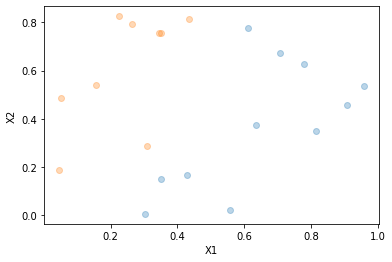

In [55]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

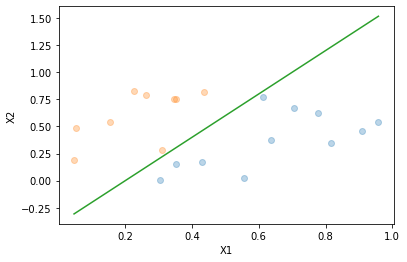

In [56]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [57]:
def sign(a):
  return (a >= 0) * 2 - 1

In [58]:
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

In [61]:
from abc import ABC, abstractmethod

class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y, activation):
    pass

class PseudoInversa(TrainingAlgorithm):
  def getW(self, X, y):
    return np.linalg.pinv(X) @ y

class DescidaGradiente(TrainingAlgorithm):
  def __init__(self, max_iter=100, learning_rate=0.05):
    self.max_iter = max_iter
    self.learning_rate = learning_rate
  def getW(self, X, y):
    w = np.random.uniform(-1, 1, size=X.shape[1])
    for _ in range(self.max_iter):
      ypred = X @ w
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      w += (X.T @ erros) * self.learning_rate
    return w

1.0
[-0.39336777  2.89520898 -1.76011943]


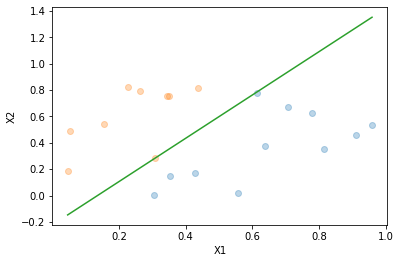

In [63]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, training_algorithm=DescidaGradiente()):
     self.w = None
     self.activation = sign
     self.training_algorithm = training_algorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.training_algorithm.getW(Xb, y)

  def __pre_activation(self, X):
    Xb = include_bias(X)
    return Xb @ self.w

  def predict(self, X):
    a = self.__pre_activation(X)
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


0.967


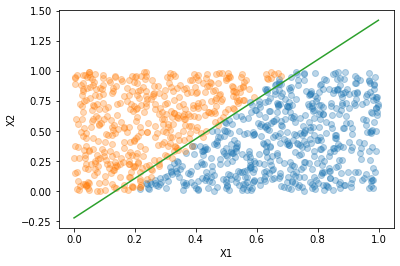

In [64]:
Xte, yte = criaDatasetBidimensionalBinário(1000)
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])

1.0
[-0.39786133  2.90258079 -1.75833248]


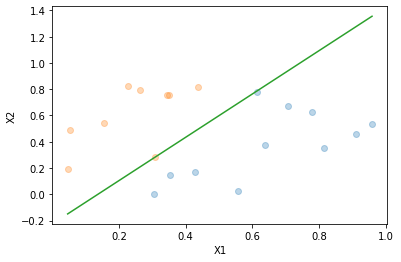

0.967


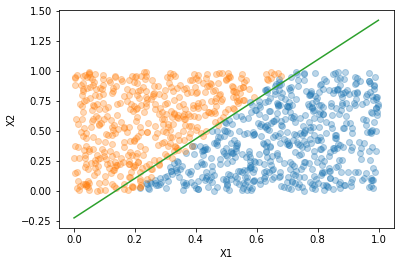

In [65]:
perceptron = Perceptron(PseudoInversa())
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])
plt.show()

print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])